In [13]:
import json
import torch
import numpy as np
import pandas
import cv2
import matplotlib.pyplot as plt

In [37]:
with open("./data/za_traffic_2020/traffic_train/train_traffic_sign_dataset.json","r+") as f:
    x = json.load(f)

In [38]:
x['categories']

[{'supercategory': 'Cấm ngược chiều', 'id': 1, 'name': 'Cấm ngược chiều'},
 {'supercategory': 'Cấm dừng và đỗ', 'id': 2, 'name': 'Cấm dừng và đỗ'},
 {'supercategory': 'Cấm rẽ', 'id': 3, 'name': 'Cấm rẽ'},
 {'supercategory': 'Giới hạn tốc độ', 'id': 4, 'name': 'Giới hạn tốc độ'},
 {'supercategory': 'Cấm còn lại', 'id': 5, 'name': 'Cấm còn lại'},
 {'supercategory': 'Nguy hiểm', 'id': 6, 'name': 'Nguy hiểm'},
 {'supercategory': 'Hiệu lệnh', 'id': 7, 'name': 'Hiệu lệnh'}]

In [39]:
len(x["annotations"])

11000

In [40]:
image_id  = []
for e in x["annotations"]:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-40-9100bb36a063>, line 3)

In [41]:
print(x["annotations"][1])

{'segmentation': [], 'area': 6889, 'iscrowd': 0, 'image_id': 5, 'bbox': [1069, 355, 83, 83], 'category_id': 3, 'id': 1}


In [42]:
image = cv2.imread("./data/za_traffic_2020/traffic_train/images/5.png")

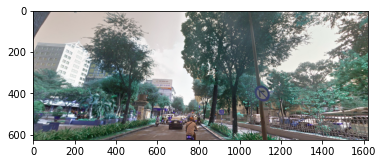

In [43]:
plt.imshow(image)

In [44]:
img=cv2.rectangle(image, (1069, 355), (1069+83, 355+83), (255,0,0), 2)
img = cv2.rectangle(img,(768,480),(768+9,480+7),(255,0,0), 2)

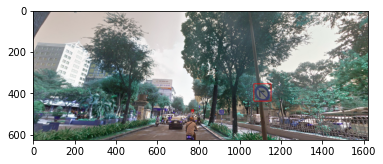

In [45]:
plt.imshow(img)

In [46]:
def get_anotation_with_id(index):
    box = []
    for e in x["annotations"]:
        if e["image_id"] == index:
            box.append([e['category_id']-1] + e['bbox'])
    return box

In [47]:
image_id = []
for e in x["annotations"]:
    if e["image_id"] not in image_id:
        image_id.append(e["image_id"])
        

In [48]:
img.shape

(626, 1622, 3)

In [58]:
for idx in image_id:
    img = cv2.imread("./data/za_traffic_2020/traffic_train/images/{}.png".format(idx))
    yy,xx = img.shape[:2]
    box = get_anotation_with_id(index=idx)
    with open("./data/za_traffic_2020/traffic_train/images/{}.txt".format(idx),"w+") as f:
        for b in box:
            f.write("{} {} {} {} {}\n".format(b[0],(b[1]+b[3])/xx,(b[2]+b[4])/yy,b[3]/xx,b[4]/yy))
                     

In [33]:
box=get_anotation_with_id(5)

In [34]:
box

[[2, 1069, 355, 83, 83], [1, 768, 480, 9, 7]]

In [36]:
x

1622

In [51]:
np.random.shuffle(image_id)

In [55]:
len(image_id[:4500//10])

450

In [60]:
import os
for i in image_id[:450]:
    img = cv2.imread("./data/za_traffic_2020/traffic_train/images/{}.png".format(i))
    cv2.imwrite("./data/za_traffic_2020/traffic_train/val/{}.png".format(i),img)
    yy,xx = img.shape[:2]
    box = get_anotation_with_id(index=i)
    with open("./data/za_traffic_2020/traffic_train/val/{}.txt".format(i),"w+") as f:
        for b in box:
            f.write("{} {} {} {} {}\n".format(b[0],(b[1]+b[3])/xx,(b[2]+b[4])/yy,b[3]/xx,b[4]/yy))